<a href="https://colab.research.google.com/github/Umarfarook1/churn_prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -19.3421 - val_accuracy: 0.8034 - val_loss: 45.5046
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -1041.9542 - val_accuracy: 0.8126 - val_loss: 414.2797
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: -6377.9092 - val_accuracy: 0.8105 - val_loss: 1304.0320
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -18038.7656 - val_accuracy: 0.8119 - val_loss: 2838.5984
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -36943.4688 - val_accuracy: 0.8141 - val_loss: 5100.6045
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -61794.6055 - val_accuracy: 0.8133 - val_loss: 8140.7764
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: -102146.4141 - val_accuracy: 0.8070 - val_loss: 12027.0391
Epoch 8/50
564/564 ━━━━━━━

Accuracy: 0.8027
Precision: 0.6518
Recall: 0.5469
F1-score: 0.5948


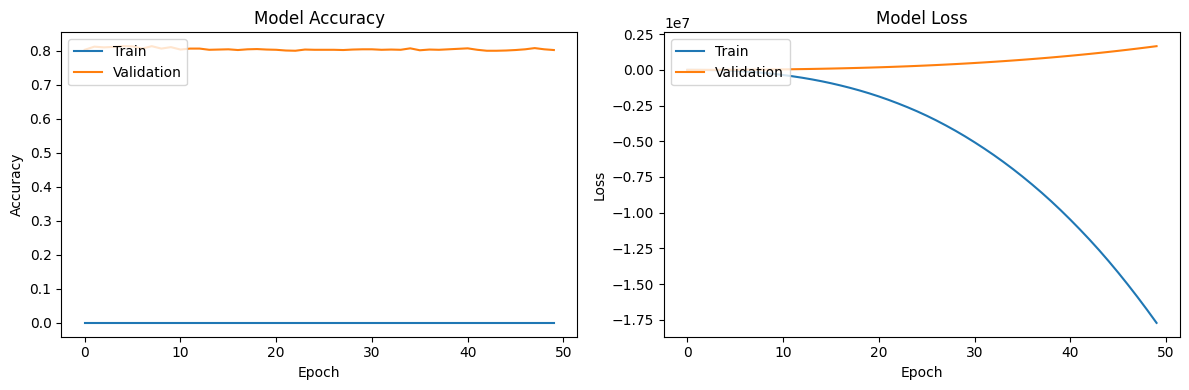

In [3]:

# Step 1: Data Preparation
def load_data(url):
    return pd.read_csv(url)

def preprocess_data(data):
    data = data.dropna()
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

    scaler = StandardScaler()
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    X = data.drop(columns=['Churn'])
    y = data['Churn']
    return X, y, label_encoders, scaler

def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the Neural Network
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Main script execution
if __name__ == "__main__":
    # Load and preprocess data
    url = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
    data = load_data(url)
    X, y, label_encoders, scaler = preprocess_data(data)

    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    y_test = y_test.astype(int)

    # Build and train model
    model = build_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int).flatten()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Save the model and preprocessing objects
    model.save('customer_churn_model.h5')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    joblib.dump(scaler, 'scaler.pkl')

    # Plotting the training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()
